In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
from datetime import datetime
import time 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Build basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i > 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | new norfolk
Processing Record 2 of Set 12 | punta arenas
Processing Record 3 of Set 12 | busselton
Processing Record 4 of Set 12 | trofors
Processing Record 5 of Set 12 | yulara
Processing Record 6 of Set 12 | chuy
Processing Record 7 of Set 12 | muros
Processing Record 8 of Set 12 | vaini
Processing Record 9 of Set 12 | rikitea
Processing Record 10 of Set 12 | butaritari
Processing Record 11 of Set 12 | atuona
Processing Record 12 of Set 12 | albany
Processing Record 13 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 12 | port elizabeth
Processing Record 15 of Set 12 | jamestown
Processing Record 16 of Set 12 | filingue
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | virginia beach
Processing Record 19 of Set 12 | hailar
Processing Record 20 of Set 12 | ushuaia
Processing Record 21 of Set 12 | praia
Processing Record 22 of Set 12 | deka

Processing Record 31 of Set 15 | vestmannaeyjar
Processing Record 32 of Set 15 | mount gambier
Processing Record 33 of Set 15 | saint-pierre
Processing Record 34 of Set 15 | hermanus
Processing Record 35 of Set 15 | half moon bay
Processing Record 36 of Set 15 | constitucion
Processing Record 37 of Set 15 | port hardy
Processing Record 38 of Set 15 | puerto madryn
Processing Record 39 of Set 15 | kolosovka
Processing Record 40 of Set 15 | laguna
Processing Record 41 of Set 15 | tilichiki
Processing Record 42 of Set 15 | bengkulu
Processing Record 43 of Set 15 | ngunguru
Processing Record 44 of Set 15 | provideniya
Processing Record 45 of Set 15 | ribeira grande
Processing Record 46 of Set 15 | kiama
Processing Record 47 of Set 15 | port lincoln
Processing Record 48 of Set 15 | cazaje
City not found. Skipping...
Processing Record 49 of Set 15 | kiunga
Processing Record 50 of Set 15 | kenai
Processing Record 1 of Set 16 | yangambi
Processing Record 2 of Set 16 | lompoc
Processing Record 

Processing Record 13 of Set 19 | sola
Processing Record 14 of Set 19 | hohhot
Processing Record 15 of Set 19 | kristiansand
Processing Record 16 of Set 19 | port macquarie
Processing Record 17 of Set 19 | chokurdakh
Processing Record 18 of Set 19 | forestville
Processing Record 19 of Set 19 | lovozero
Processing Record 20 of Set 19 | mayo
Processing Record 21 of Set 19 | toguchin
Processing Record 22 of Set 19 | beringovskiy
Processing Record 23 of Set 19 | auki
Processing Record 24 of Set 19 | pocone
Processing Record 25 of Set 19 | cabedelo
Processing Record 26 of Set 19 | eureka
Processing Record 27 of Set 19 | cape canaveral
Processing Record 28 of Set 19 | butembo
Processing Record 29 of Set 19 | grand gaube
Processing Record 30 of Set 19 | churapcha
Processing Record 31 of Set 19 | srednekolymsk
Processing Record 32 of Set 19 | gambo
Processing Record 33 of Set 19 | la libertad
Processing Record 34 of Set 19 | buala
Processing Record 35 of Set 19 | sur
Processing Record 36 of Set

Processing Record 50 of Set 22 | hamilton
Processing Record 1 of Set 23 | comodoro rivadavia
Processing Record 2 of Set 23 | kagadi
Processing Record 3 of Set 23 | mayor pablo lagerenza
Processing Record 4 of Set 23 | bull savanna
Processing Record 5 of Set 23 | bowen
Processing Record 6 of Set 23 | wanaka
Processing Record 7 of Set 23 | yenagoa
Processing Record 8 of Set 23 | ampanihy
Processing Record 9 of Set 23 | hami
Processing Record 10 of Set 23 | rawson
Processing Record 11 of Set 23 | arvika
Processing Record 12 of Set 23 | puri
Processing Record 13 of Set 23 | ascension
Processing Record 14 of Set 23 | marcona
City not found. Skipping...
Processing Record 15 of Set 23 | itororo
Processing Record 16 of Set 23 | mantua
Processing Record 17 of Set 23 | khonuu
City not found. Skipping...
Processing Record 18 of Set 23 | kapitanivka
Processing Record 19 of Set 23 | vila velha
Processing Record 20 of Set 23 | izhma
Processing Record 21 of Set 23 | sept-iles
Processing Record 22 of 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,58.66,78,16,3.11,AU,2021-12-28 21:05:40
1,Punta Arenas,-53.1500,-70.9167,57.22,66,75,9.22,CL,2021-12-28 21:05:40
2,Busselton,-33.6500,115.3333,69.08,48,0,4.27,AU,2021-12-28 21:05:41
3,Trofors,65.5333,13.4063,22.35,91,88,4.70,NO,2021-12-28 21:05:41
4,Yulara,-25.2406,130.9889,71.44,17,0,6.91,AU,2021-12-28 21:05:41
5,Chuy,-33.6971,-53.4616,76.53,44,2,12.01,UY,2021-12-28 21:05:42
6,Muros,42.7762,-9.0603,62.24,91,100,15.14,ES,2021-12-28 21:05:42
7,Vaini,-21.2000,-175.2000,84.36,74,20,6.91,TO,2021-12-28 21:05:42
8,Rikitea,-23.1203,-134.9692,78.26,79,25,14.41,PF,2021-12-28 21:05:43
9,Butaritari,3.0707,172.7902,81.82,75,84,8.21,KI,2021-12-28 21:05:43


In [8]:
# Reorder columns in city_data dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-12-28 21:05:40,-42.7826,147.0587,58.66,78,16,3.11
1,Punta Arenas,CL,2021-12-28 21:05:40,-53.1500,-70.9167,57.22,66,75,9.22
2,Busselton,AU,2021-12-28 21:05:41,-33.6500,115.3333,69.08,48,0,4.27
3,Trofors,NO,2021-12-28 21:05:41,65.5333,13.4063,22.35,91,88,4.70
4,Yulara,AU,2021-12-28 21:05:41,-25.2406,130.9889,71.44,17,0,6.91
...,...,...,...,...,...,...,...,...,...
562,Camana,PE,2021-12-28 21:21:14,-16.6228,-72.7111,73.08,75,68,6.26
563,Yar-Sale,RU,2021-12-28 21:21:14,66.8333,70.8333,-4.04,98,99,8.39
564,Nuuk,GL,2021-12-28 21:21:18,64.1835,-51.7216,23.61,68,20,9.22
565,Benguela,AO,2021-12-28 21:21:19,-12.5763,13.4055,76.48,80,98,5.28


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

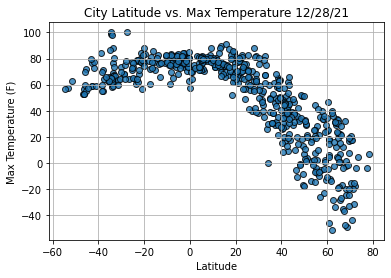

In [15]:
# Create the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save graph.
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

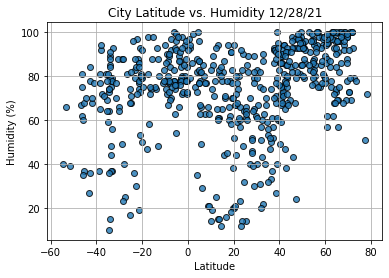

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

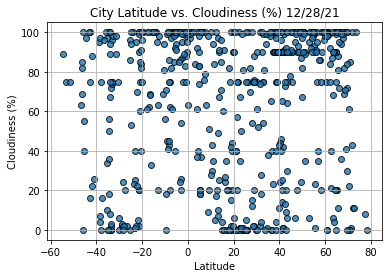

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

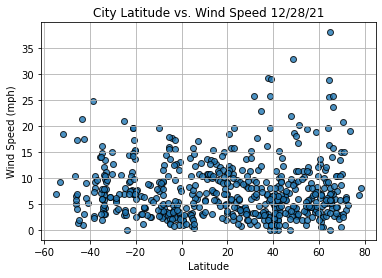

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()